## BIST 100 Stock Market Analysis (with Currency Data)

Here, we examine stock prices in Turkey (BIST 100) for the last decade. We will study possible correlations with USD/TRY currency.

In [1]:
import os
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pjoin = os.path.join

In [2]:
# Get stock price data
csv_dir_stocks = './data/stockmarket/TR'
csv_file_stocks = pjoin(csv_dir_stocks, 'BIST100_weekly_data.csv')

column_rename = {
    'Şimdi'  : 'Simdi',
    'Açılış' : 'Acilis',
    'Yüksek' : 'Yuksek',
    'Düşük'  : 'Dusuk'
}

df = pd.read_csv(csv_file_stocks, index_col=0, parse_dates=True, dayfirst=True)
# Reverse the dataframe so that data begins in 2010
df = df.iloc[::-1]
# Rename some columns
df.rename(columns=column_rename, inplace=True)
df.head()

,Simdi,Acilis,Yuksek,Dusuk,Hac.,Fark %
Tarih,,,,,,
2010-03-28,"58.059,86","57.069,41","58.383,65","56.244,68","3,03B","2,56%"
2010-04-04,"59.185,30","58.499,65","59.592,87","57.752,14","2,85B","1,94%"
2010-04-11,"58.223,53","59.670,23","59.771,82","57.759,01","3,83B","-1,63%"
2010-04-18,"58.338,36","57.291,30","59.482,67","56.770,58","2,72B","0,20%"
2010-04-25,"58.959,10","59.425,90","59.526,07","56.867,01","3,10B","1,06%"


In [6]:
def convert_to_float(val_in_str):
    '''Convert value in string to float.'''
    base, decimal = val_in_str.split(',')
    base = base.replace('.', '')
    value = float('.'.join([base,decimal]))
    return value

# Convert values in df to floats
stockprices = df['Simdi']
stockprices = stockprices.apply(convert_to_float)
stockprices.head()

Tarih
2010-03-28    58059.86
2010-04-04    59185.30
2010-04-11    58223.53
2010-04-18    58338.36
2010-04-25    58959.10
Name: Simdi, dtype: float64

In [34]:
# Get currency data (USD/TRY, EUR/TRY, GBP/TRY)
csv_dir_currency = './data/currency'
csv_files = {
    'USD' : pjoin(csv_dir_currency, 'USD_TRY_HistoricalData.csv'),
    'EUR' : pjoin(csv_dir_currency, 'EUR_TRY_HistoricalData.csv'),
    'GBP' : pjoin(csv_dir_currency, 'GBP_TRY_HistoricalData.csv')
}

df_cur = {key : pd.read_csv(filename, index_col=0, parse_dates=True)['Price'].iloc[::-1] for key, filename in csv_files.items()}

for key, df in df_cur.items():
    print(df.head())

Date
2010-03-28    1.5146
2010-04-04    1.4889
2010-04-11    1.4831
2010-04-18    1.4831
2010-04-25    1.4897
Name: Price, dtype: float64
Date
2010-03-28    2.0453
2010-04-04    2.0099
2010-04-11    2.0020
2010-04-18    1.9853
2010-04-25    1.9810
Name: Price, dtype: float64
Date
2010-03-28    2.3035
2010-04-04    2.2893
2010-04-11    2.2782
2010-04-18    2.2809
2010-04-25    2.2749
Name: Price, dtype: float64


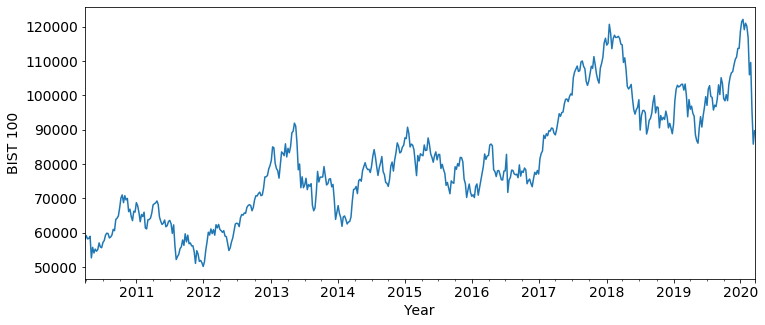

In [33]:
# Plot 
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(1,1,figsize=(12,5))
stockprices.plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('BIST 100')
fig.savefig('./fig/stockmarket/BIST100_weekly_data.pdf')


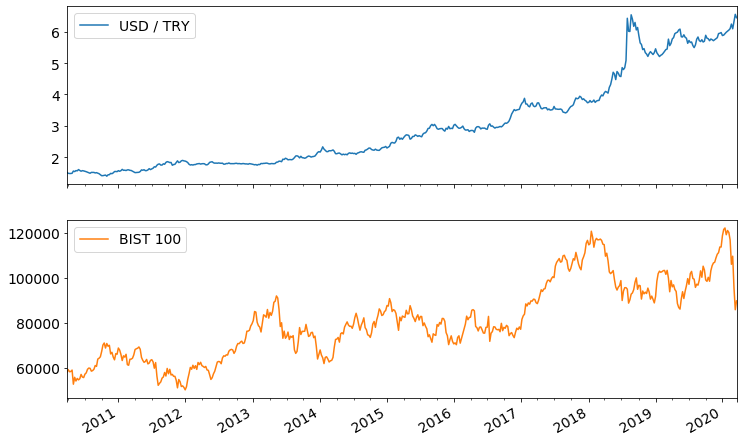

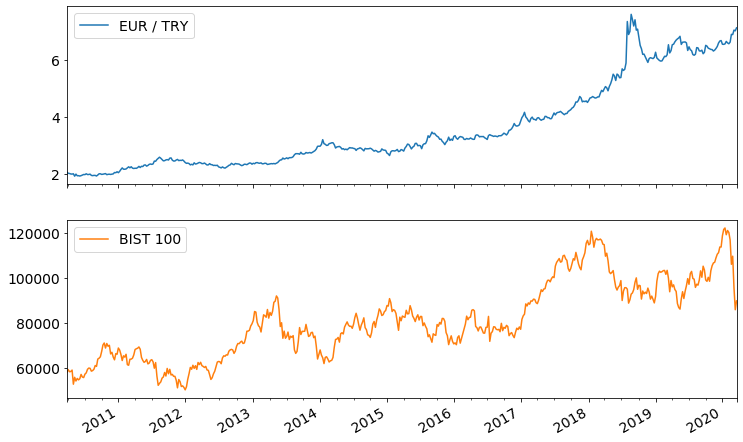

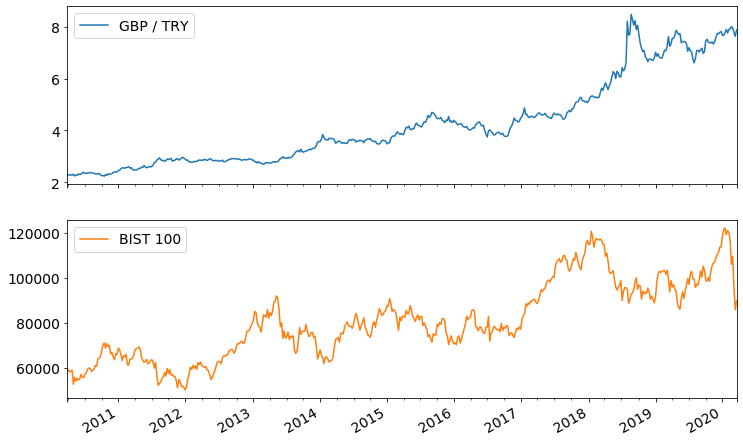

In [36]:
# Plot currencies and stock prices

combined_dfs = {}

for key, currency_data in df_cur.items():
    df_comb = pd.DataFrame({f'{key} / TRY': currency_data, 'BIST 100' : stockprices})
    df_comb.plot(subplots=True, figsize=(12,8))
    plt.savefig(f'./fig/combined/{key}_try_and_bist100.pdf')
    combined_dfs[key] = df_comb

### 2018-2019 Period

Here, we take a look at a shorter time period: 2018-2019.

           USD / TRY  BIST 100
USD / TRY    1.00000  -0.81324
BIST 100    -0.81324   1.00000
           EUR / TRY  BIST 100
EUR / TRY    1.00000  -0.76082
BIST 100    -0.76082   1.00000
           GBP / TRY  BIST 100
GBP / TRY    1.00000  -0.75731
BIST 100    -0.75731   1.00000


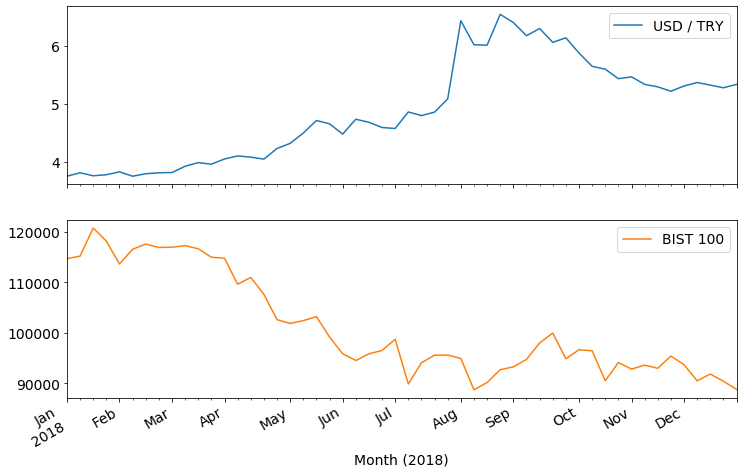

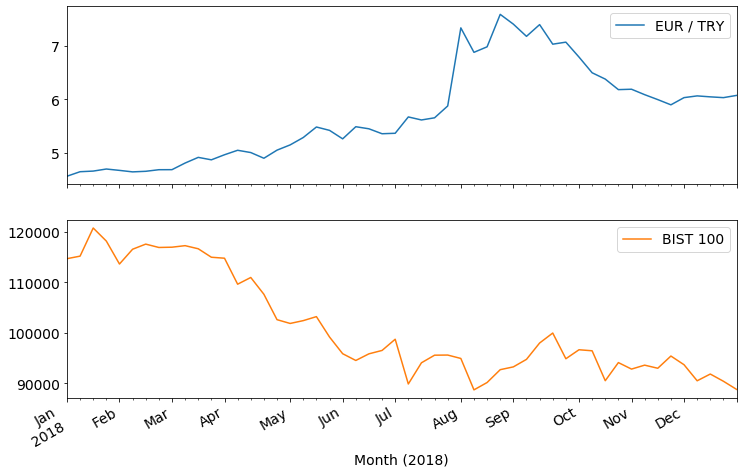

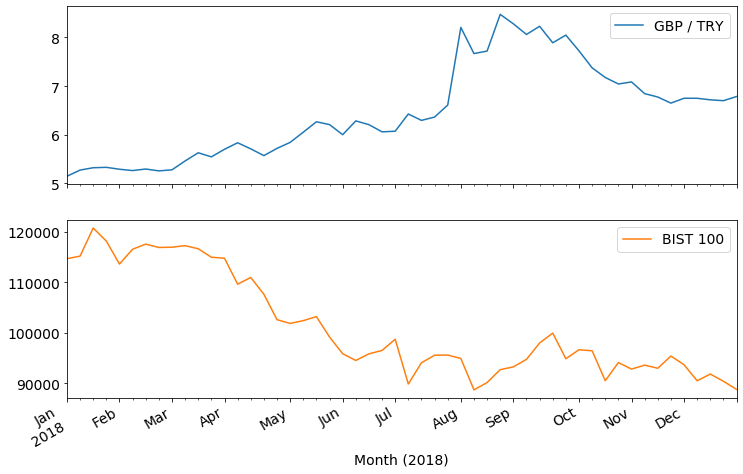

In [37]:
for key, df_comb in combined_dfs.items():
    df_2018_2019 = df_comb.loc['2018-01-01':'2019-01-01']
    df_2018_2019.plot(subplots=True, figsize=(12,8))
    plt.xlabel('Month (2018)')
    plt.savefig(f'./fig/combined/{key}_try_and_bist100_2018.pdf')
    
    # Calculate correlation
    print(df_2018_2019.corr())